# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [110]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/lab-time-series/your-code/')

Mounted at /content/drive


In [111]:
from google.colab import files
# uploaded = files.upload()

In [112]:
# Import numpy and pandas
import pandas as pd
import numpy as np

In [113]:
from matplotlib import pyplot as plt
from matplotlib import cm

In [114]:
import seaborn as sns

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [194]:
# Run this code:

sensor = pd.read_csv("drive/MyDrive/Colab Notebooks/lab-time-series/sub_1.csv")
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [195]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [196]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


In [197]:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [198]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [199]:
# pd.date_range(start, end, periods, freq)

dates = pd.date_range("01/01/2018 00:00:00", "01/01/2018 00:29:10", periods=len(sensor))
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [200]:
len(dates)

1751

In [201]:
freq = pd.infer_freq(dates)
print(freq)

S


In [202]:
dates.freq = freq
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [203]:
sensor['dates'] = pd.to_datetime(dates)
sensor = sensor.set_index("dates")

In [204]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
dates,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

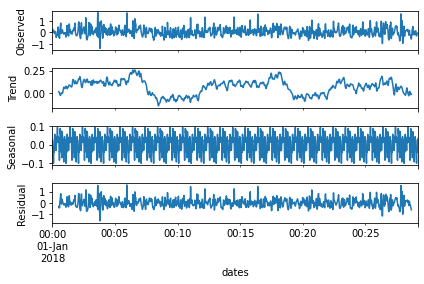

In [205]:
res = seasonal_decompose(sensor['userAcceleration.x'], model="additive", freq=60)
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

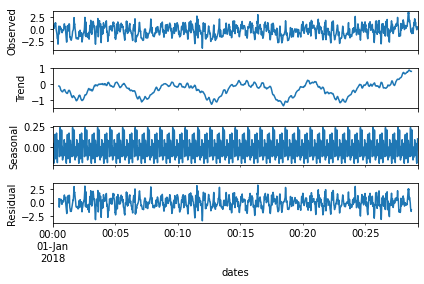

In [206]:
res = seasonal_decompose(sensor['rotationRate.x'], model="additive", freq=60)
res.plot();

Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

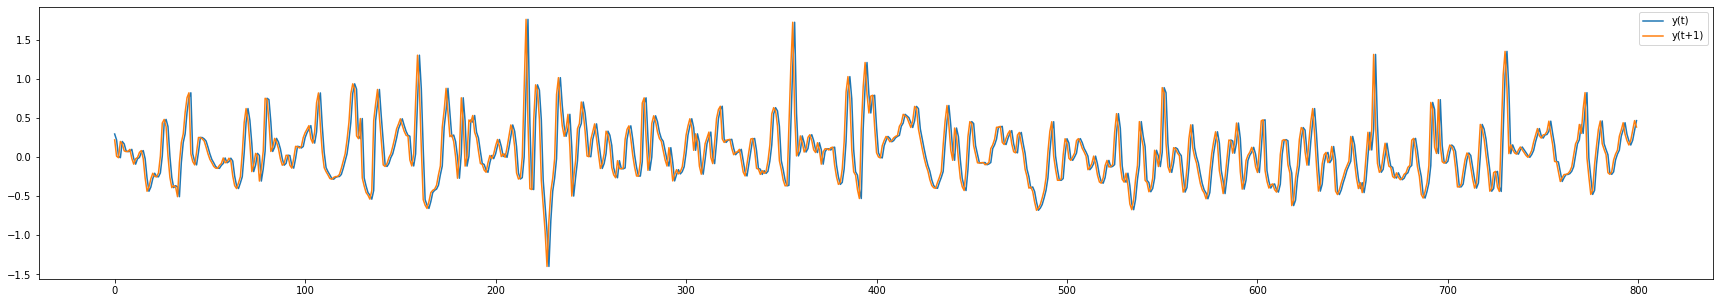

In [207]:
signal = sensor["userAcceleration.x"][:-1]
delayed_copy = sensor["userAcceleration.x"][1:]
plt.figure(figsize=(30,5))
plt.plot(signal[:800].values, label="y(t)")
plt.plot(delayed_copy[:800].values, label="y(t+1)")
plt.legend();

No handles with labels found to put in legend.


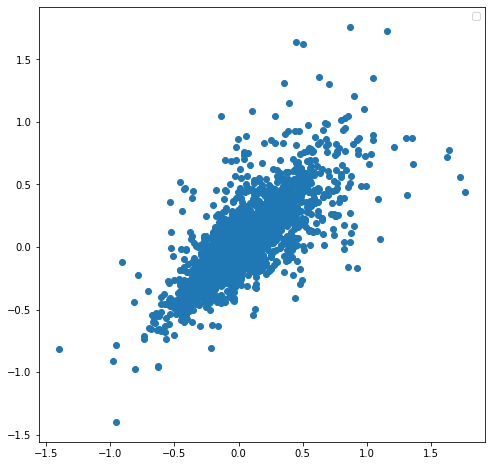

In [208]:
plt.figure(figsize=(8,8))
plt.scatter(signal[:1751].values, delayed_copy[:1751])
plt.legend();


Create a lag plot for `rotationRate.x`

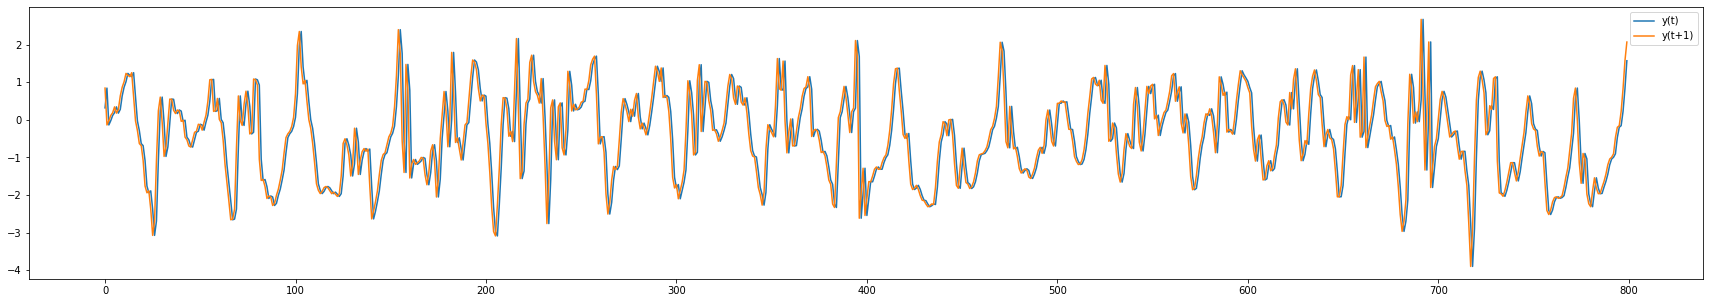

In [209]:
signal = sensor["rotationRate.x"][:-1]
delayed_copy = sensor["rotationRate.x"][1:]
plt.figure(figsize=(30,5))
plt.plot(signal[:800].values, label="y(t)")
plt.plot(delayed_copy[:800].values, label="y(t+1)")
plt.legend();

No handles with labels found to put in legend.


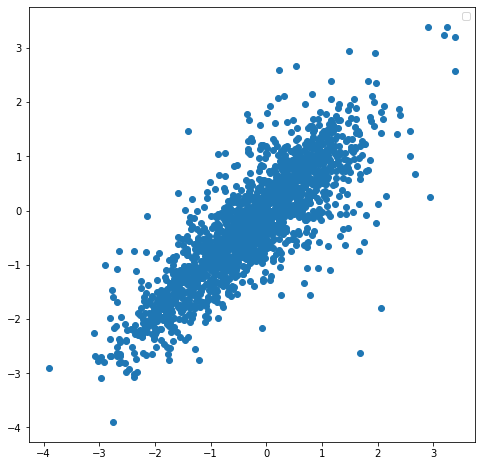

In [210]:
plt.figure(figsize=(8,8))
plt.scatter(signal[:1751].values, delayed_copy[:1750])
plt.legend();

What are your conclusions from both visualizations?

- Very strong correlation.
We can have an idea of what is happening in the first period time.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

-Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.


-Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [211]:
x = sensor["userAcceleration.x"]
y = sensor["rotationRate.x"]

In [212]:
def cointegration_test(y, x):
    # Step 1: regress on variable on the other
    ols_result = sm.OLS(y, x).fit()
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether
    #        the residual is unit root
    return adfuller(ols_result.resid)

In [213]:
res = cointegration_test(y, x)
res

(-4.920823244263645,
 3.176160461798618e-05,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '10%': -2.567662770090317,
  '5%': -2.863216966926812},
 2531.2087785090175)

In [214]:
adf, pvalue, usedlag, nobs, critical_values, icbest = res

In [215]:
adf

-4.920823244263645

In [216]:
critical_values

{'1%': -3.4341465551936534,
 '10%': -2.567662770090317,
 '5%': -2.863216966926812}

In [217]:
pvalue

3.176160461798618e-05

What are your conclusions from this test?

- Running the example prints the test statistic value of -4.9. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

- As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4.9 is less than the value of -3.4341465551936534 at 1%.

- This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

- Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

https://machinelearningmastery.com/time-series-data-stationary-python/